# Biostat M280 Homework 1
Cameron S. Goldbeck

#### Due Apr 21 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with git and github.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

0. Register an account on [github.com](https://github.com) using your UCLA email. Email your github username to teaching assistant Juhyun Kim <juhkim111@ucla.edu>, who will create a private repository for you.  

0. Top directories of the repository should be `hw1`, `hw2`, ... Create two branches `master` and `develop`. The `develop` branch will be your main playground, the place where you develop solution (code) to homework problems and write up report. The `master` branch will be your presentation area. Put your homework submission files (IJulia notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in `master` branch.  

0. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

0. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming by John Myles White. Following rules in the style guide will be strictly enforced when grading: (4), (6), (7), (8), (9), (12), (13) and (16).

Q1: Check!

## Q2

Let's check whether floating-point numbers obey certain algebraic rules.  
0. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

0. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

0. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

0. Is `0 * x == 0` true for all floating-point number `x`?  

0. Is `x / a == x * (1 / a)` always true?




In [2]:
#Define values
x = 0.1
y = 0.1
z = 1.0

@show (x + y) + z == x + (y + z)

@show (x * y) * z == x * (y * z)

a=2.0

@show a * (x + y) == a * x + a * y

@show 0 * x == 0


(x + y) + z == x + (y + z) = false
(x * y) * z == x * (y * z) = true
a * (x + y) == a * x + a * y = true
0x == 0 = true


true

Q2:

1. We find that for floating point numbers, association rule does not hold. This is because the first value is 1.20 while the second is 1.200000...

2. This holds.

3. This holds.

4. This holds.

5. This holds. 

## Q3

Consider Julia function
```julia
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end
```
0. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input. Does the result surprise you?  
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input. Does the result surprise you?  
2. Read Julia documentation on `@fastmath` and repeat the last question on the function  

```julia
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end
```

In [1]:
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end

function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end

c=Int64(12)
d=Float64(12)

@code_llvm g(c)
@code_llvm g(d)

@code_llvm g_fastmath(c)
@code_llvm g_fastmath(d)


define i64 @julia_g_71456(i64) #0 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}

define double @julia_g_71466(double) #0 {
top:
  %1 = fmul double %0, 5.000000e+00
  %2 = fadd double %1, -1.000000e+00
  %3 = fmul double %2, 5.000000e+00
  %4 = fadd double %3, -1.000000e+00
  %5 = fmul double %4, 5.000000e+00
  %6 = fadd double %5, -1.000000e+00
  %7 = fmul double %6, 5.000000e+00
  %8 = fadd double %7, -1.000000e+00
  %9 = fmul double %8, 5.000000e+00
  %10 = fadd double %9, -1.000000e+00
  %11 = fmul double %10, 5.000000e+00
  %12 = fadd double %11, -1.000000e+00
  %13 = fmul double %12, 5.000000e+00
  %14 = fadd double %13, -1.000000e+00
  %15 = fmul double %14, 5.000000e+00
  %16 = fadd double %15, -1.000000e+00
  %17 = fmul double %16, 5.000000e+00
  %18 = fadd double %17, -1.000000e+00
  %19 = fmul double %18, 5.000000e+00
  %20 = fadd double %19, -1.000000e+00
  ret double %20
}

define i64 @julia_g_fastmath_71468(i64) #0 {
top:
  %1 = mul i64 %0, 

Q3:

1. The bitcode for the a 64 bit number does not appear suprising. It is doing simply addition on the number.

2. The bitcode for the Float64 appear more complicated. Many operations are done.

3. Using Fast Math, the bitcode for Int64 and Float64 appear to be very similar and excute similiar operations.

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.  
0. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` at points `x`.  

1. Plot the polynomial `y = (x - 1)^7` at points `x`.  

2. Explain what you found.


plot(x,y1) = Plot{Plots.PyPlotBackend() n=1}



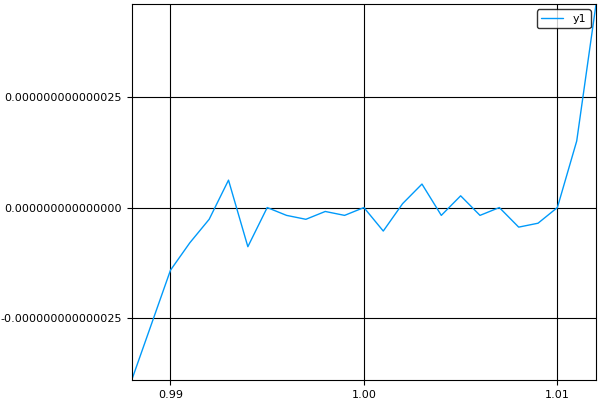

In [17]:
#Initialize x vector
x = zeros(24)
x = x + .988

#Correct values
for i in 2:24
    x[i] = x[i] + i / 1000
  end

# Polynomial for 1
y1 = x.^7 - 7x.^6 + 21x.^5 - 35x.^4 + 35x.^3 - 21x.^2 + 7x.- 1

# Polynomial for 2
y2 = (x - 1).^7

using Plots

pyplot()

@show plot(x, y1)

plot(x,y2) = Plot{Plots.PyPlotBackend() n=1}



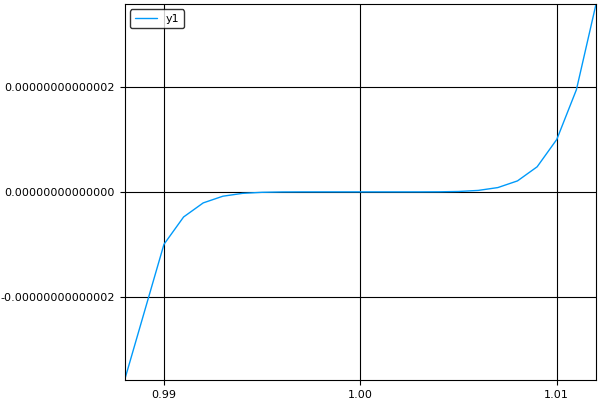

In [18]:
@show plot(x, y2)

Q2:
1. First graph.

2. Second graph.

3. Despite being the same polynomial, we see the first graph is not smooth. This because the coponents of x are small and close to each other. Therefore, when we do operations in (1.), addition and multiplication, we lose precison, creating values of y1 that are far from their true values y2. In (2.), we do less operations, and maintain precison. 

## Q5

Read in the matrix in the file `longley.txt` on the macroeconomic data from 1947 to 1962.  The columns are Employment, Prices, GNP, Jobless, Military, PopSize and Year. Plot the pairwise scatter plot between these variables. What do you observe?


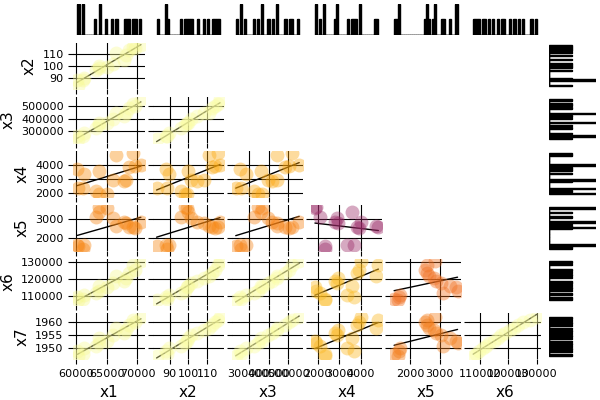

In [153]:
using StatPlots; pyplot()

#Reda the data set
df = readtable("longley.txt", separator = ' ')

#transfer data set values to matrix
M = [ df[i,j] for i=1:size(df, 1), j=1:size(df,2)]

cornerplot(M, compact=true)



Q7:
It appear that Employment, Prices, GNP, Population size, and Year are correlated heavily with each other. However, Jobless and military seen to have a vague relationship with the other variables. 

## Q6

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  
0. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 3 ways, e.g., looping, [comprehension](https://docs.julialang.org/en/stable/manual/arrays/?highlight=comprehension#comprehensions), and vectorization. Compute and print `H` for `n = 5`.   
0. Compare their efficiencies at `n = 1000`.
0. Try different rounding modes (use function `setrounding(Float64, RoundingMode)`) and report the entry `inv(H)[1, 1]` for `n = 15`.

In [74]:
using BenchmarkTools

#Via loops
function h1(n)
    H = zeros(n,n)
    for i in 1:n
      for j in 1:n
        H[i, j] = 1 / (i + j -1)
      end
    end
    H
end

#Via comprehension
function h2(n)
  H = [ 1 / (i + j - 1) for i=1:n, j=1:n]
  H
end

#Via Vectorization
function h3(n)
    m = [ i for i = 1 : n]
    k = ones(n,n)
    A = *(diagm(m), k) + *(k, diagm(m))-1
    H = 1 ./ A
    H
end



INFO: Recompiling stale cache file /Users/camerongoldbeck/.julia/lib/v0.5/JLD.ji for module JLD.


h3 (generic function with 1 method)

In [75]:
#Part 1
h1(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [76]:
h2(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [77]:
h3(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [79]:
#Part 2
@benchmark h1(1000)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     4.771 ms (0.00% GC)
  median time:      5.394 ms (0.00% GC)
  mean time:        6.157 ms (13.81% GC)
  maximum time:     12.989 ms (32.34% GC)
  --------------
  samples:          809
  evals/sample:     1

In [80]:
@benchmark h2(1000)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     4.229 ms (0.00% GC)
  median time:      4.735 ms (0.00% GC)
  mean time:        5.887 ms (19.62% GC)
  maximum time:     10.474 ms (44.99% GC)
  --------------
  samples:          845
  evals/sample:     1

In [81]:
@benchmark h3(1000)

BenchmarkTools.Trial: 
  memory estimate:  61.04 MiB
  allocs estimate:  29
  --------------
  minimum time:     2.463 s (0.09% GC)
  median time:      2.476 s (0.33% GC)
  mean time:        2.504 s (1.69% GC)
  maximum time:     2.574 s (4.53% GC)
  --------------
  samples:          3
  evals/sample:     1

In [88]:
#Part 3
#Creatine RoundingMode- RoundUp
setrounding(Float64, RoundUp) do
    H = h1(15)
    inv(H)[1, 1]
end

151.34155625849962

Q6:
1. All three methods produce same H matrix for n=5.
2. It appears the fastes method is the comprehension, while the vectorization was noticably the slowest.
3. setrounding works.